<h1><center>Bivariate Analysis</center></h1>
<h1><center><u>"Categorical & Categorical"</u></center></h1>
<h1><center>features</center></h1>
<h2><center><u>Visualization, Hypothesis Testing</u></center></h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
employee_data=pd.read_csv('../../Data/employee_data.csv')
employee_data.head()

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,Qualification,Degree,YearsOfStudy,EducationalInstitute,Gender,Empl_Band
0,e1,Director,15.0,85000,0.33,2,1332,Grad,NaN,15.0,clg,M,A
1,e2,Jr.Dev,3.0,25000,5.67,16,6666,Grad,Btech,16.0,clg,F,C
2,e3,Sr.Dev,6.0,36000,2.33,7,3332,PostGrad,Msc,17.0,unv,M,B
3,e4,Jr.Dev,2.0,20000,9.00,24,9999,NaN,Mtech,18.0,NaN,F,C
4,e5,Sr.Dev,5.0,37000,3.00,9,3999,NaN,Btech,16.0,NaN,F,B


### Let's try to analyze two categorical columns "Gender" as input and "Designation" as output feature

In [4]:
employee_data_chi_square = employee_data.loc[:, ['Gender','Designation']]
employee_data_chi_square.head()

,Gender,Designation
0,M,Director
1,F,Jr.Dev
2,M,Sr.Dev
3,F,Jr.Dev
4,F,Sr.Dev


In [5]:
employee_data_chi_square['Gender'].unique()

array(['M', 'F'], dtype=object)

In [6]:
employee_data_chi_square['Designation'].unique()

array(['Director', 'Jr.Dev', 'Sr.Dev', 'Manager', 'Sr.Analyst',
       'Sr.Manager', 'Analyst'], dtype=object)

<h1><center><u>Visualization</u></center></h1>

## Let's try to understand the support for women in this orgnization (Empowering women at workplace)
  * How much percentage of women are present in higher management roles (Manager and above)?.
  
  
### Need to draw a bar graph between "Gender" and "Designation", first we need to answer below questions to do so.
* Q1) What is the type of explanatory variable (Categorical/Quantitative) ?
  * **Ans:** "Gender" is a Categorical variable
  

* Q2) What is the type of the response variable (Categorical/Quantitative) ?
  * **Ans:** "Designation" is a Categorical variable
  
  
* Q3) If response variable is Categorical - find out how many categories are in it ?. 
  * **<font color='red'>Note:</font>** <u>"Only Two Categories Should Be Present in Response Variable"</u> to generate a BAR graph - the response variable must be **collapsed to bi-variate**. 
  * **Ans:** As we are trying to understand the percentage of "Managers and above designations (1)" vs "below Manager designations (0)" 

In [7]:
print("Gender column - datatype : ", employee_data_chi_square['Gender'].dtype)
print("Designation column - datatype : ", employee_data_chi_square['Designation'].dtype)

print("Number of categories in Designation column : ", employee_data_chi_square['Designation'].unique().shape)

Gender column - datatype :  object
Designation column - datatype :  object
Number of categories in Designation column :  (7,)


### Collapsed "Designation" to 2 categories (0, 1) 

In [8]:
def mapDesignationToBinary(designation):
    if(designation in ['Director', 'Manager', 'Sr.Analyst', 'Sr.Manager']):
        return 1
    else:
        return 0

In [9]:
employee_data_chi_square["Designation_binary"] = \
                employee_data_chi_square["Designation"].apply(lambda x: mapDesignationToBinary(x))

In [10]:
employee_data_chi_square["Designation_binary"].value_counts()

1    20
0    12
Name: Designation_binary, dtype: int64

### Bar height shows the percentage of 1's in each category(M/F), it seems women in manageral roles are less compared to men.

Text(6.799999999999997, 0.5, 'Percentage of Managers')

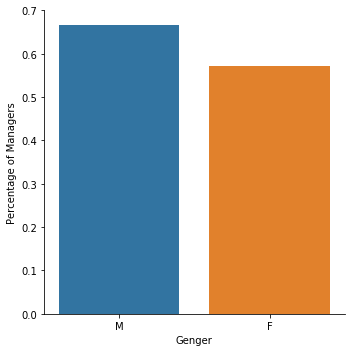

In [11]:
sns.catplot(data=employee_data_chi_square, 
            x="Gender", y="Designation_binary", 
            kind="bar", ci=None)
plt.xlabel("Genger")
plt.ylabel("Percentage of Managers")

### Non-Manager percentages

In [11]:
def mapDesignationToBinary(designation):
    if(designation in ['Jr.Dev', 'Sr.Dev', 'Analyst']):
        return 1
    else:
        return 0

In [12]:
employee_data_chi_square["Designation_binary"] = \
                employee_data_chi_square["Designation"].apply(lambda x: mapDesignationToBinary(x))

In [13]:
employee_data_chi_square["Designation_binary"].value_counts()

0    20
1    12
Name: Designation_binary, dtype: int64

Text(0.42499999999999716, 0.5, 'Percentage of Managers')

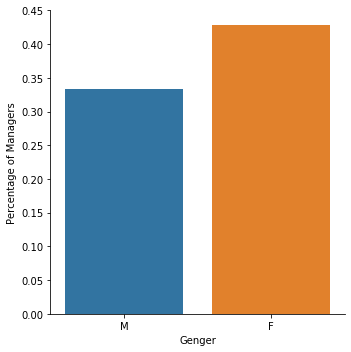

In [14]:
sns.catplot(data=employee_data_chi_square, x="Gender", y="Designation_binary", kind="bar", ci=None)
plt.xlabel("Genger")
plt.ylabel("Percentage of Managers")

<h1><center><u>Hypothesis Testing</u></center></h1>

## Can we use "Gender" to predict "Designation" ?. Chi-Square Test for Independence can answer this question as "Gender" and "Designation" are categorical features.

### Hypothesis Testing : Chi-Square Test
* **Null Hypothesis (H0):** "Gender" of the employee and "Designation" are independent
* **Alternate Hypothesis (H1):** "Gender" of the employee and "Designation" are not independent(dependent).

In [15]:
cros_tab_gen_desig = pd.crosstab(employee_data_chi_square.Gender, employee_data_chi_square.Designation, margins = True)
cros_tab_gen_desig

Designation,Analyst,Director,Jr.Dev,Manager,Sr.Analyst,Sr.Dev,Sr.Manager,All
Gender,,,,,,,,
F,2,0,2,2,4,2,2,14
M,4,2,0,4,5,2,1,18
All,6,2,2,6,9,4,3,32


In [16]:
chi2_value, p, dof, ex_table = stats.chi2_contingency(cros_tab_gen_desig, correction=False)

In [17]:
print("Expected Values: ", ex_table)

Expected Values:  [[ 2.625   0.875   0.875   2.625   3.9375  1.75    1.3125 14.    ]
 [ 3.375   1.125   1.125   3.375   5.0625  2.25    1.6875 18.    ]
 [ 6.      2.      2.      6.      9.      4.      3.     32.    ]]


In [18]:
print("P - Values: ", p)

P - Values:  0.9801175893588029


In [19]:
chi2_value

5.361552028218695

* P-Value 0.98 >0.05 (so calculated chi2-value greater than the p-value (level of marginal significance when null hypothesis is true))
* We fail to reject null hypothesis so we **accept our null hypothesis H0**
* i.e **Gender and designation are independent.**

### How does it (Chi-Square Test for Independence) working ? - please refer to ppt.

## Chi-Square Test for Independence when Independent Variable has more than 2 Categories

### Hypothesis Testing : Chi-Square Test
* **Null Hypothesis (H0):** "Empl_Band" of the employee and "Designation" are independent
* **Alternate Hypothesis (H1):** "Empl_Band" of the employee and "Designation" are not independent(dependent).

In [20]:
employee_data.groupby('Empl_Band').size()

Empl_Band
A    14
B    10
C     8
dtype: int64

In [21]:
employee_data_chi_square2 = employee_data.loc[:, ['Empl_Band','Designation']]
employee_data_chi_square2.head()

,Empl_Band,Designation
0,A,Director
1,C,Jr.Dev
2,B,Sr.Dev
3,C,Jr.Dev
4,B,Sr.Dev


In [22]:
cross_tab2_employ_desig = pd.crosstab(employee_data_chi_square2.Empl_Band, employee_data_chi_square2.Designation, margins = True)
cross_tab2_employ_desig

Designation,Analyst,Director,Jr.Dev,Manager,Sr.Analyst,Sr.Dev,Sr.Manager,All
Empl_Band,,,,,,,,
A,0,2,0,0,9,0,3,14
B,0,0,0,6,0,4,0,10
C,6,0,2,0,0,0,0,8
All,6,2,2,6,9,4,3,32


In [23]:
chi2_value2 = stats.chi2_contingency(cross_tab2_employ_desig)
chi2_value2

(64.0,
 3.1109581681732875e-06,
 21,
 array([[ 2.625 ,  0.875 ,  0.875 ,  2.625 ,  3.9375,  1.75  ,  1.3125,
         14.    ],
        [ 1.875 ,  0.625 ,  0.625 ,  1.875 ,  2.8125,  1.25  ,  0.9375,
         10.    ],
        [ 1.5   ,  0.5   ,  0.5   ,  1.5   ,  2.25  ,  1.    ,  0.75  ,
          8.    ],
        [ 6.    ,  2.    ,  2.    ,  6.    ,  9.    ,  4.    ,  3.    ,
         32.    ]]))

### Above outcome shows that P-Value 0.000003 < 0.05, by looking at this we may reject the null hypothersis.
### We may conclude "Empl_Band" and "Designation" are dependent on each other.

### <font color='red'>Caution: </font> The P-Value is unreliable as there are more than 2 categories in "Empl_Band" column. We should check significance againest pairs of categories (ex: 'A' to 'B', 'A' to 'C' and 'B' to 'C')
### As P-Value is unreliable, we may do "Type - I" or "Type - II" error.
  * Type I Error : An in-correct decision made "to reject Null Hypothesis" 
  * Type II Error : An in-correct decision made "to accept Null Hypothesis".
  
### In our case we might have done a "Type - I" error.  

### To protect against "Type - I " or "Type - II" error, 
  * a) We use bonferroni adjustment for significance level
  * b) The significance level is used in PAIR-WISE Chi-Square Test.

### Bonferroni Adjustment for actual P-Value (0.05)
  * Number of pairs out of "Empl_Band" categories is 3c2 = 3
  * Adjusted P-Value = 0.05/3 = 0.0167.

In [24]:
uniq_cats = employee_data_chi_square2['Empl_Band'].unique()
seen_cat = []
accept_nh_list = []
fail_to_accept_nh_list = []
for cat1 in uniq_cats:
    seen_cat.append(cat1)
    for cat2 in uniq_cats:
        if (cat2 not in seen_cat):
            print("calculating chi-square test for \"{0}\"  - \"{1}\"PAIR".format(cat1, cat2))
            df2_copy = employee_data_chi_square2.copy()
            df2_copy['Empl_Band'] = employee_data_chi_square2['Empl_Band'].map({cat1:cat1, cat2:cat2})
            ct = pd.crosstab(df2_copy.Empl_Band, df2_copy.Designation, margins=True)
            c2table = stats.chi2_contingency(ct)
            pair = cat1, "-", cat2
            if (c2table[1] < 0.0167):
                print("Reject null hypothesis")
                fail_to_accept_nh_list.append(pair)    
            else:
                print('Accept Null hypothesis')
                accept_nh_list.append(pair)
            print(100*'-')

calculating chi-square test for "A"  - "C"PAIR
Reject null hypothesis
----------------------------------------------------------------------------------------------------
calculating chi-square test for "A"  - "B"PAIR
Reject null hypothesis
----------------------------------------------------------------------------------------------------
calculating chi-square test for "C"  - "B"PAIR
Accept Null hypothesis
----------------------------------------------------------------------------------------------------
